In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


K-MEANS

In [2]:
customer_Data = pd.read_csv('C:/School/Mall_Customers.csv', sep=',')
customer_Data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [3]:
customer_df = pd.DataFrame(customer_Data[['Annual Income (k$)', 'Spending Score (1-100)']])
customer_df.head()

Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

In [4]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_df = pd.DataFrame(scale.fit_transform(customer_df), columns = ['income', 'spending'])

scaled_df.head()

income  spending
0 -1.738999 -0.434801
1 -1.738999  1.195704
2 -1.700830 -1.715913
3 -1.700830  1.040418
4 -1.662660 -0.395980

<AxesSubplot:xlabel='income', ylabel='spending'>

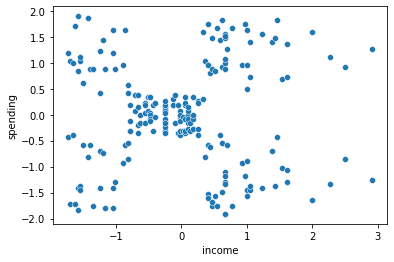

In [5]:
# Visualize the position 
import seaborn as sns

sns.scatterplot(data = scaled_df, x='income', y='spending')

In [6]:
# set the parameter for evaluating K
kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300,
                 "random_state": 42,}

# check the inertia for each K
SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(scaled_df)
    SSE.append(kmeans.inertia_)

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


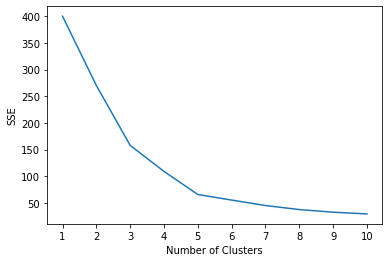

In [7]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [8]:
# using kneelocator to find the elbow/knee

from kneed import KneeLocator
findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
print('the best k for your model is ', findknee.elbow)

the best k for your model is  5


In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random", n_clusters=5, max_iter=300, random_state=42)
kmeans.fit_predict(scaled_df)

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

Text(0, 0.5, 'Spending')

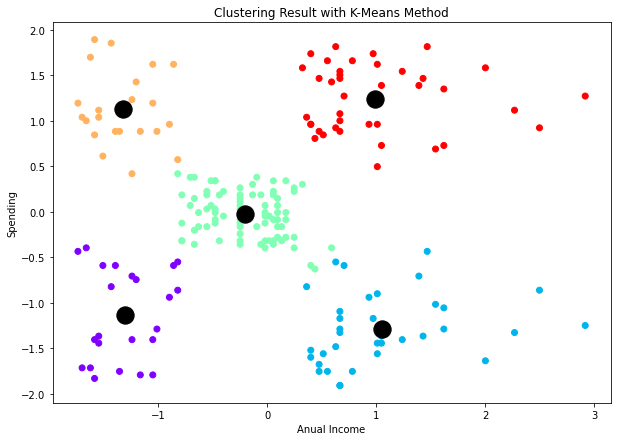

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.title("Clustering Result with K-Means Method")
plt.scatter(scaled_df.iloc[:,0], scaled_df.iloc[:,1], c=kmeans.labels_, 
            cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='black')
plt.xlabel("Anual Income")
plt.ylabel("Spending")

random forest

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
car_data = pd.read_csv('C:/School/car_evaluation.csv', sep=',',header=None)
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data.columns = col_names
car_data.head()


buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

In [46]:
X = car_data.drop(['class'], axis=1)
y = car_data['class']
X.head()

buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    low
1  vhigh  vhigh     2       2    small    med
2  vhigh  vhigh     2       2    small   high
3  vhigh  vhigh     2       2      med    low
4  vhigh  vhigh     2       2      med    med

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [9]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [48]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

In [50]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, 
                out_file='car_tree.dot', 
                feature_names = X_train.columns,
                class_names = y_train.unique().tolist(),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [55]:
from subprocess import call
call(['dot', '-Tpng', 'car_tree.dot', '-o', 'car_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'car_tree.png')

In [30]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [31]:
conda install graphviz

Solving environment: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.11.0

Please update conda by running


## Package Plan ##

  environment location: c:\Users\ASUS\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    expat-2.5.0                |       hd77b12b_0         225 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hb646838_1         855 KB
    libffi-3.4.4               |       hd77b12b_0         113 KB
    libgd-2.3.3                |       ha43c60c_1         314 KB
    pango-1.50.7             



    $ conda update -n base -c defaults conda




Apriori

In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

! pip install mlxtend

In [57]:
url = 'https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv'
transaction = pd.read_csv(url)
transaction.head()

0       1     2       3       4       5       6
0   Bread    Wine  Eggs    Meat  Cheese  Pencil  Diaper
1   Bread  Cheese  Meat  Diaper    Wine    Milk  Pencil
2  Cheese    Meat  Eggs    Milk    Wine     NaN     NaN
3  Cheese    Meat  Eggs    Milk    Wine     NaN     NaN
4    Meat  Pencil  Wine     NaN     NaN     NaN     NaN

In [60]:
import pandas as pd


products = ['Milk', 'NaN', 'Bagel', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Wine', 'Diaper', 'Bread']

def create_product_columns(value, product):
    if value['0'] == product or value['1'] == product or value['2'] == product or value['3'] == product or value['4'] == product or value['5'] == product or value['6'] == product:
        return 1
    else:
        return 0


for product in products:
    transaction[product] = transaction.apply(lambda x: create_product_columns(x, product), axis=1)

transaction.head()


Milk  Bagel  Eggs  Meat  Cheese  Pencil  Wine  Diaper  Bread
0     0      0     1     1       1       1     1       1      1
1     1      0     0     1       1       1     1       1      1
2     1      0     1     1       1       0     1       0      0
3     1      0     1     1       1       0     1       0      0
4     0      0     0     1       0       1     1       0      0

In [63]:
new_transaction = transaction[['Milk','NaN','Bagel','Eggs','Meat','Cheese','Pencil','Wine','Diaper','Bread']]
new_transaction.head()


Milk  NaN  Bagel  Eggs  Meat  Cheese  Pencil  Wine  Diaper  Bread
0     0    0      0     1     1       1       1     1       1      1
1     1    0      0     0     1       1       1     1       1      1
2     1    0      0     1     1       1       0     1       0      0
3     1    0      0     1     1       1       0     1       0      0
4     0    0      0     0     1       0       1     1       0      0

In [64]:
new_transaction = new_transaction.drop(['NaN'], axis=1)
new_transaction.head()

Milk  Bagel  Eggs  Meat  Cheese  Pencil  Wine  Diaper  Bread
0     0      0     1     1       1       1     1       1      1
1     1      0     0     1       1       1     1       1      1
2     1      0     1     1       1       0     1       0      0
3     1      0     1     1       1       0     1       0      0
4     0      0     0     1       0       1     1       0      0

In [65]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(new_transaction, min_support=0.2, use_colnames=True)
frequent_itemsets

c:\Users\ASUS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support              itemsets
0   0.501587                (Milk)
1   0.425397               (Bagel)
2   0.438095                (Eggs)
3   0.476190                (Meat)
4   0.501587              (Cheese)
5   0.361905              (Pencil)
6   0.438095                (Wine)
7   0.406349              (Diaper)
8   0.504762               (Bread)
9   0.225397         (Milk, Bagel)
10  0.244444          (Milk, Eggs)
11  0.244444          (Milk, Meat)
12  0.304762        (Milk, Cheese)
13  0.219048          (Wine, Milk)
14  0.279365         (Milk, Bread)
15  0.279365        (Bread, Bagel)
16  0.266667          (Eggs, Meat)
17  0.298413        (Eggs, Cheese)
18  0.241270          (Wine, Eggs)
19  0.323810        (Cheese, Meat)
20  0.250794          (Wine, Meat)
21  0.206349         (Bread, Meat)
22  0.200000      (Pencil, Cheese)
23  0.269841        (Wine, Cheese)
24  0.200000      (Diaper, Cheese)
25  0.238095       (Bread, Cheese)
26  0.200000        (Wine, Pencil)
27  0.200000       (Bread, Pencil)
28  0.234921        (Wine, Diaper)
29  0.244444         (Wine, Bread)
30  0.231746       (Bread, Diaper)
31  0.203175  (Cheese, Milk, Meat)
32  0.215873  (Cheese, Eggs, Meat)

In [66]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules

antecedents consequents  antecedent support  consequent support  \
0           (Milk)    (Cheese)            0.501587            0.501587   
1         (Cheese)      (Milk)            0.501587            0.501587   
2          (Bagel)     (Bread)            0.425397            0.504762   
3           (Eggs)      (Meat)            0.438095            0.476190   
4           (Eggs)    (Cheese)            0.438095            0.501587   
5         (Cheese)      (Meat)            0.501587            0.476190   
6           (Meat)    (Cheese)            0.476190            0.501587   
7           (Wine)    (Cheese)            0.438095            0.501587   
8   (Milk, Cheese)      (Meat)            0.304762            0.476190   
9   (Meat, Cheese)      (Milk)            0.323810            0.501587   
10    (Milk, Meat)    (Cheese)            0.244444            0.501587   
11  (Eggs, Cheese)      (Meat)            0.298413            0.476190   
12  (Meat, Cheese)      (Eggs)            0.323810            0.438095   
13    (Eggs, Meat)    (Cheese)            0.266667            0.501587   

     support  confidence      lift  leverage  conviction  zhangs_metric  
0   0.304762    0.607595  1.211344  0.053172    1.270148       0.350053  
1   0.304762    0.607595  1.211344  0.053172    1.270148       0.350053  
2   0.279365    0.656716  1.301042  0.064641    1.442650       0.402687  
3   0.266667    0.608696  1.278261  0.058050    1.338624       0.387409  
4   0.298413    0.681159  1.358008  0.078670    1.563203       0.469167  
5   0.323810    0.645570  1.355696  0.084958    1.477891       0.526414  
6   0.323810    0.680000  1.355696  0.084958    1.557540       0.500891  
7   0.269841    0.615942  1.227986  0.050098    1.297754       0.330409  
8   0.203175    0.666667  1.400000  0.058050    1.571429       0.410959  
9   0.203175    0.627451  1.250931  0.040756    1.337845       0.296655  
10  0.203175    0.831169  1.657077  0.080564    2.952137       0.524816  
11  0.215873    0.723404  1.519149  0.073772    1.893773       0.487091  
12  0.215873    0.666667  1.521739  0.074014    1.685714       0.507042  
13  0.215873    0.809524  1.613924  0.082116    2.616667       0.518717

regression tree

In [102]:
wine_data = pd.read_csv('C:/School/winequalityN.csv', sep=',')
wine_data.head()

from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import train_test_split

X = wine_data['alcohol'].to_numpy()
y = wine_data['quality'].to_numpy()
X = np.reshape(X, (-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
regressor = DecisionTreeRegressor(max_depth=1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)



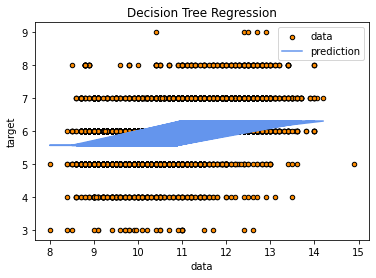

In [103]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

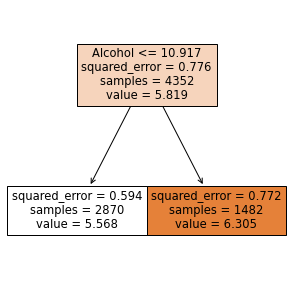

In [107]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5,5))
plot_tree(regressor, feature_names=[feature_name], filled=True)
plt.show()

Boosting 

In [119]:
from sklearn.ensemble import AdaBoostRegressor

# Load the wine data
wine_data = pd.read_csv('C:/School/winequalityN.csv', sep=',')

# Prepare the features and target variables
X = wine_data['alcohol']
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create the AdaBoostRegressor model
boosting_tree = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the model
boosting_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = boosting_tree.predict(X_test)


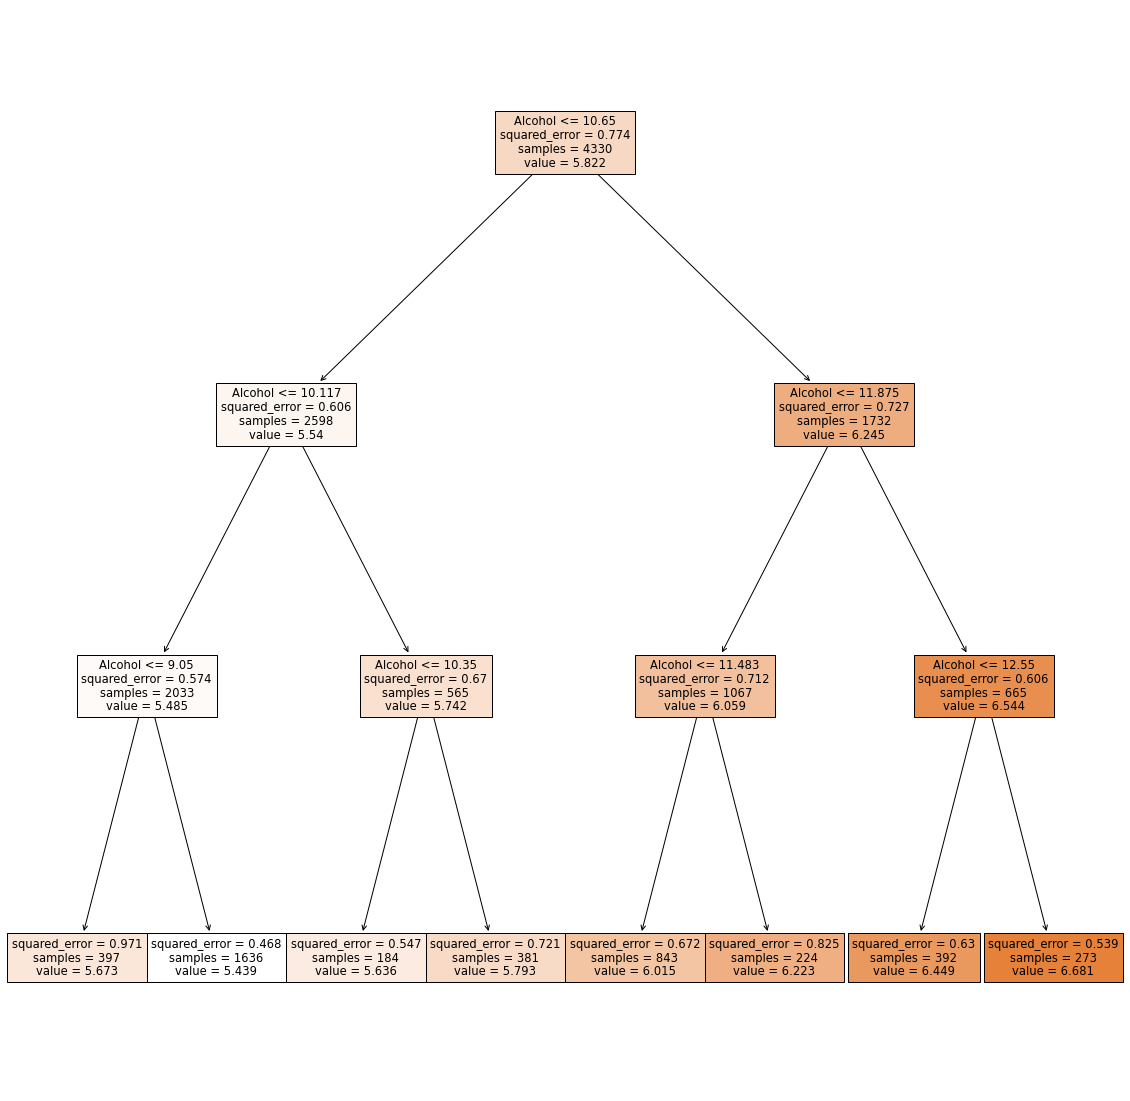

In [126]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plot_tree(boosting_tree.estimators_[0], feature_names=[feature_name], filled=True)
plt.show()


Bagging

In [127]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Load the wine data
wine_data = pd.read_csv('C:/School/winequalityN.csv', sep=',')

# Prepare the features and target variables
X = wine_data['alcohol']
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create the base estimator
base_estimator = DecisionTreeRegressor(max_depth=1)

# Create the BaggingRegressor model
bagging_tree = BaggingRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Train the model
bagging_tree.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions on the test set
y_pred = bagging_tree.predict(X_test.values.reshape(-1, 1))


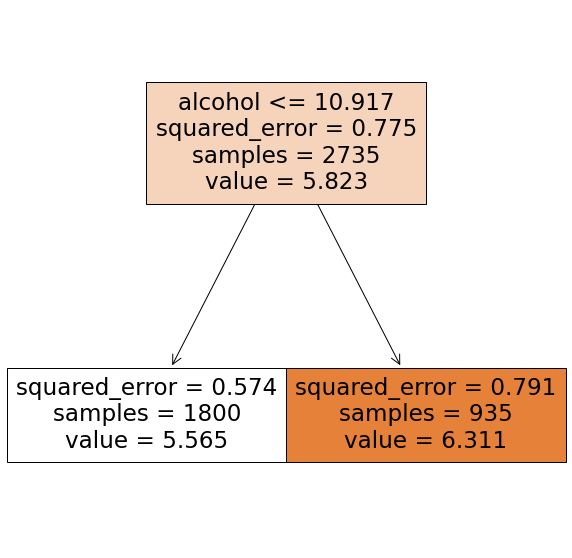

In [128]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plot_tree(bagging_tree.estimators_[0], feature_names=['alcohol'], filled=True)
plt.show()
